# Comment faire des graphiques pour Labo?

Je crois que le but de ce notebook c'est principalement de comprendre que si t'essayes de trouver une manière de faire un truc en python, il y a probablement déjà une fonction qui fait exactement ce que tu veux faire. La documentation est ta meilleur amie.

Si tu veux tu peux collapser chaque point en cliquant sur la flèche à côté de chaque titre de section. Comme ça c'est bcp plus facile de retrouver un truc plus tard.

Attention! — pour que le tuto marche bien, il faut avoir le fichier avec les données dans le même dossier dans ton ordi que le fichier python du tuto

## 1. Importer les libraries nécessaires

Il faut les avoir installées avec `pip install ...`

Une commande pour tout faire fonctionner ici est:
`pip install numpy==2.0.1 matplotlib==3.9.2 scipy==1.14.1 uncertainties==3.2.2 ipykernel ipython`

In [33]:
import numpy as np  # pour manipuler des np.array() (vecteurs)
import matplotlib.pyplot as plt  # pour pouvoir faire des graphiques
import scipy as sc  # pour des fits arbitraires 

## 2. Définir des paramètres

c'est les paramètres généraux que matplotlib va utiliser pour les graphiques en output. c'est utile de les définir une fois. c'est le type de truc que je copie colle à chaque fois au début d'un fichier python (avec aussi l'import des libraries)

In [34]:
plt.rcParams.update(
    {
        "text.usetex" : True, # utiliser police latex, mais il faut installer latex pour que la commande marche, sinon tout le code crash
                              # dcp si tu l'as pas enlève les deux premières lignes des configs ici pls
        "font.family": "serif", # latex aussi
        "font.size": 12,  # taille par défaut de la police, pour tout
        "axes.labelsize": 12,  # redefinit la taille pour la legende des axes
        "legend.fontsize": 12,  # pareil pour la legende, ajuster en function de la place et du contenu
        "xtick.labelsize": 12,  # taille numerotation des axes
        "ytick.labelsize": 12,  # pareil
        "figure.figsize": (3.9, 2.925),  # taille de la figure en pouces, correspond a 1/2 page horizontalement et une certaine valeur verticalement

        'lines.markersize': 12,  # des plus gros markeurs pour les scatterplot (il faut les mettre plus grands que tu penses)
        'errorbar.capsize': 3,  # taille des bords des barres d'erreurs, evite de se repeter a chaque fois

        "savefig.bbox" : "tight", # quand tu sauvegardes les graphes à la fin ça assure que tu coupes pas des parties de l'image
        "legend.framealpha" : 1, # légende opaque sur les graphes
        "axes.grid" : 1  # met des quadrillages sur les graphes
    } 
)

## 3. Load the data

In [35]:
delimiter = ','
n = 1

data = np.loadtxt("data.csv", delimiter=delimiter, skiprows=n) # np.loadtxt() met les données de "data.csv" dans une liste "data"
# delimiter ça définit le truc qui sépare chaque info dans le fichier de données
# skiprows définit le nombre de rangées à sauter qui ne sont pas des données

In [36]:
# définir les axes
x = data[:,0] # voir: manipulations de numpy arrays https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html
y = data[:,1]
# data[:,0] prend tous les élements dans la première colonne du array data qui a 2 dimensions

In [37]:
# voir / verifier le contenu
data, x, y
# tout ce qui est en fin de cellule est affiché automatiquement

(array([[ 1.,  1.],
        [ 2.,  2.],
        [ 3.,  3.],
        [ 4.,  4.],
        [ 5.,  5.],
        [ 6., 11.],
        [ 7., 15.],
        [ 8., 16.],
        [ 9., 17.]]),
 array([1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([ 1.,  2.,  3.,  4.,  5., 11., 15., 16., 17.]))

## 4. Graph the data

il y a des fonctions différentes pour créer des plots. la plus commune et la plus génerale est plt.plot()

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

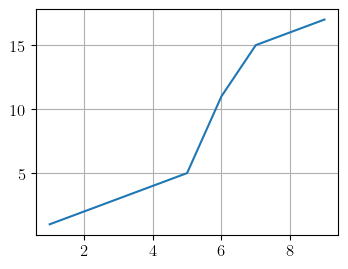

In [38]:
plt.plot(x, y) # avec les configurations de défaut + les paramètres qu'on a définit au début

tbh tu peux regarder la documentation pour plus de modifications de couleur etc. parce que vraiment the possibilities are endless. tu peux faire tout ce que tu veux. mais la taille des points c'est le plus important:

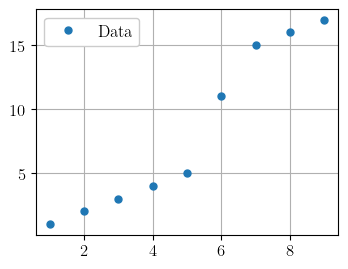

In [39]:
ms = 10 # change la taille des points
plt.plot(x, y, '.', ms=ms, label='Data')
plt.legend() # affiche la légende, documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

J'AI OUBLIÉ DE LABEL MES AXES => IVA VA ME TUER

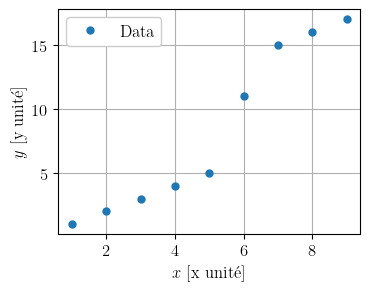

In [40]:
ms = 10 
plt.plot(x, y, '.', ms=ms, label='Data')
plt.legend()
plt.xlabel('$x$ [x unité]') # grandeur en italiques, mais son unité non
                            # tout ce qui est entre `$ ... $` va etre formatté en latex.
                            # ATTENTION: les erreurs de latex sont souvent très obscures a decoder (voir prochaine cellule)
plt.ylabel('$y$ [y unité]')
plt.savefig('image.pdf') # sauvegarde le graphe en pdf sous le nom "image.pdf"
# c'est joli les pdfs parce que c'est jamais pixelé, mais tu peux remplacer le .pdf pour un .png aussi
# (utile pour des figures avec BEAUCOUP de donneés)

Quelques conseils pour le latex dans les plots / sur python

In [41]:
# Pour faire des strings avec du latex:
r"$\LaTeX$ hors latex $dans latex$" 
# le r"..." permet de dire de ne pas interpreter les "\..." comme des caracteres spéciaux python
# autrement sans le r"..."
"$\\LaTeX$ hors latex $dans latex$"
# avec des format string, il faut faire attention aux {}:
# pour mettre un "{", il faut tapper "{{"
a = 1
b = 3
assert f"$\\frac{{{a}}}{{{b}}}$" == r"$\frac{1}{3}$"  # assert fait une erreur si l'égalité n'est pas vraie

# Erreur obscure a savoir reconnaitre
plt.xlabel(r"$\invalide$ [u.a.]")
# Error in callback <function _draw_all_if_interactive at 0x7f4f1571f9c0> (for post_execute), with arguments args (),kwargs {}:

plt.gcf().clear()  # évite d'afficher les erreurs cette fois en supprimant la figure

<Figure size 390x292.5 with 0 Axes>

## 5. Analyse des données

### 5.1. Faire un fit

méthode la plus facile + commune -> np.polyfit() 

documentation: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html pour les détails

In [42]:
degree_of_fit = 1 # droite, 2 pour quadratique etc
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)

# polynome_output contient [a,b] t.q. y = a*x+b pour data données en argument à la fonction
a = polynome_output[0]
b = polynome_output[1]

# erreurs
# les erreurs sur les coefficients sont sqrt(matrice_covariante[0,0]) et sqrt(matrice_covariante[1,1]) 
# dcp la diagonale à la racine carree
# don't ask me why tbh, it's something that you'll see in data and proba stat mais j'ai pas trop écouté en cours (skill diff @Lucia)

da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])
# ou encore plus court:
da, db = np.sqrt(np.diag(matrice_covariante))

print(a, da, b, db) # voilà ton fit

2.283333333333334 0.2426975821925644 -3.1944444444444446 1.365735584242801


pour plot le fit avec les données

Text(0, 0.5, '$y$ [y unité]')

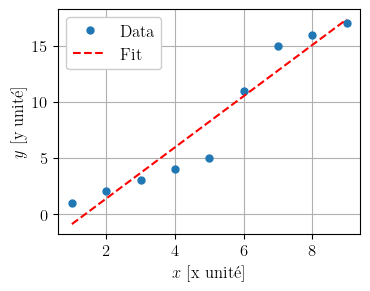

In [43]:
# copié d'en haut
ms = 10
plt.plot(x, y, '.', ms=ms, label='Data')

# plot le fit
truc = np.linspace(x[0], x[-1], 10) # crée un array de 10 éléments distribués uniformément dans l'intervalle [x[0], x[-1]] 
                             # avec x[-1] le dernier élement de l'array x
# cet array nous permet de plotter le fit en faisant
plt.plot(truc, a*truc+b, 'r--', label='Fit') # en général on plotte le fit en pointillé et dans une couleur difƒérente
                                             # Tom: je préfere perso les mettre en soit en noir ('k--'), soit la couleur des points s'il y plusieurs fits
# faut aussi écrire l'équation du fit en légende tout le temps

plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

tous les assistants on des opinions différentes sur les conventions d'écrire l'équation d'un fit. le plus safe c'est de faire ça


Text(0, 0.5, '$y$ [y unité]')

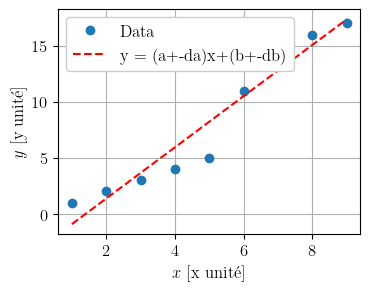

In [44]:
# sans latex, en vrai c'est moche sans latex, stp installe latex sur ton ordi --> https://www.latex-project.org/get/ / https://www.tug.org/texlive/
plt.plot(x, y, '.', label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label='y = (a+-da)x+(b+-db)') # légende moche et cause légende overlap avec points => super bad all the time
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

Text(0, 0.5, '$y$ [y unité]')

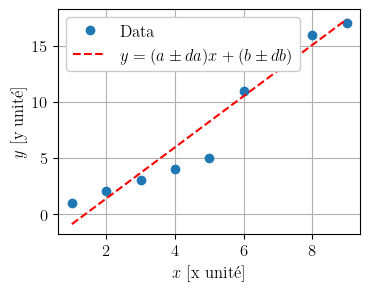

In [45]:
# avec latex
plt.plot(x, y, '.', label='Data')
truc = np.linspace(x[0], x[-1], 10)
# en réalité il y a pas à définir le linspace dans chaque bulle, le jupyter notebook se rappelle des variables
# faut juste pas nommer deux variables avec le meme nom
# et s'assurer que la variable est définie avant son utilisation
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a \pm da)x+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')
# ATTENTION: LA LEGENDE OVERLAP ICI PAS BIEN POUR RAPPORTS
# pour régler il faut jouer avec la taille de la figure et la taille de la légende par rapport à la figure

(on va ignorer le fait que j'ai pas vraiment écrit les valeurs du fit parce que j'ai pas vraiment trouvé de manière d'optimiser l'arrondi des valeurs sans d'autres libraries et ça fuck tout et c'est un peu chiant de définir l'utilisation de la librarie uncertainties et c'est juste pas très important)

(pendant tout le ba3 et ba4 j'ai juste passé ma vie a print les valeurs des coeffs et de leurs erreurs, et faire les arrondis dans ma tête. puis écrire les valeurs dans l'argument label de la fonction plt.plot correspondante)

Text(0, 0.5, '$y$ [y unité]')

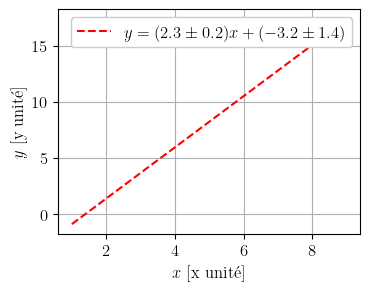

In [46]:
# tom: pour fixer le skill diff de Lucia: 
# lucia: :'(
plt.plot(truc, a*truc+b, 'r--', label=r'$y = ({:.1f} \pm {:.1f})x+({:.1f} \pm {:.1f})$'.format(a, da, b, db))
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')

### 5.2. Plusieurs fits au même temps

a bit self explanatory, mais c'est cool de le voir

Text(0, 0.5, '$y$ [y unité]')

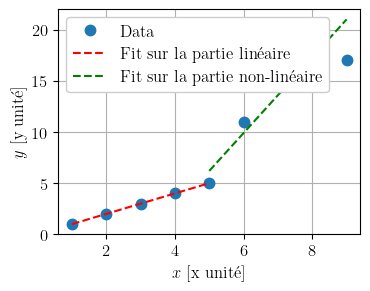

In [47]:
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x[0:4], y[0:4], deg=degree_of_fit, cov=True) # partie linéaire
polynome_output2, matrice_covariante2 = np.polyfit(x[4:-1], y[4:-1], deg=degree_of_fit, cov=True) # partie non linéaire dcp un peu con de faire un fit linéaire mais bon

a = polynome_output[0]
b = polynome_output[1]
a2 = polynome_output2[0]
b2 = polynome_output2[1]

da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])
# ou
da, db = np.sqrt(np.diag(matrice_covariante))
da2 = np.sqrt(matrice_covariante2[0][0])
db2 = np.sqrt(matrice_covariante2[1][1])
# ou
da2, db2 = np.sqrt(np.diag(matrice_covariante2)) # tom il utilise des tricks fancy mdr

truc = np.linspace(x[0], x[4], 10)
truc2 = np.linspace(x[4], x[-1], 10)

plt.plot(x, y, '.', ms=15, label="Data")
plt.plot(truc, a*truc+b, 'r--', label='Fit sur la partie linéaire')
plt.plot(truc2, a2*truc2+b2, 'g--', label='Fit sur la partie non-linéaire')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')
# et encore une fois les paramètres de tom causent des overlap entre les points et la légende
# en vrai mc tu vas passer ta vie à régler les problèmes comme ça c'est super chiant

### 5.3. Faire un fit arbitraire

de temps en temps il faut faire un fit d'une fonction spéciale sur tes résultats, genre des $A e^{-\lambda t}\cos(\omega t + \varphi)$

(lucia: j'ai eu la flemme de ressortir mes tps pour trouver comment faire ça, merci tommm)

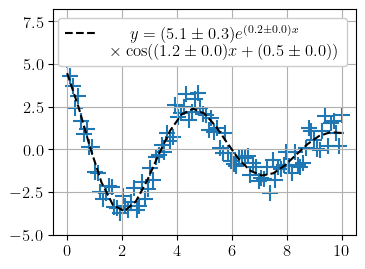

In [48]:
fake_data_x = np.linspace(0, 10, 100)
fake_data_y = 5 * np.exp(-0.15 * fake_data_x) * np.cos(1.23 * fake_data_x + np.pi/6) + (np.random.random(fake_data_x.shape) - 0.5) * 2
plt.scatter(fake_data_x, fake_data_y, marker='+')

# fonction a fit
def func_to_fit(t, A, lmbda, omega, phi):  # !! lambda est un mot reservé !!
    return A * np.exp(-lmbda * t) * np.cos(omega * t + phi)

# faire le fit
coefs, cov = sc.optimize.curve_fit(func_to_fit, fake_data_x, fake_data_y)
A, lmbda, omega, phi = coefs
dA, dLmbda, dOmega, dPhi = np.sqrt(np.diag(cov))
fitx = np.linspace(0, 10, 25)
fity = func_to_fit(fitx, *coefs)  # *coefs met tous les coefs au bon endroit dans l'appel, equivalent a faire `A, lmbda, omega, phi`
# bien mettre la fonction dans la legende / le latex. pour les retours a la ligne: "\\".
# oui c'est chiant a tapper. non il n'y a pas vraiment de meilleure option
plt.plot(
    fitx, fity, 'k--',
    label=r"$y = ({:.1f} \pm {:.1f}) e^{{({:.1f} \pm {:.1f}) x}} \\ \times \cos(({:.1f} \pm {:.1f}) x + ({:.1f} \pm {:.1f}))$".format(A, dA, lmbda, dLmbda, omega, dOmega, phi, dPhi)
)
# pour eviter que la legende overlap, il faut bidouiller
plt.ylim(-5, 8.2)
plt.legend()

### 5.4. Barres d'erreur (!!!! Important !!!!)

documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html

Pour les premiers petits tps je crois qu'ils s'en foutent si tu fais des barres d'erreur, mais si t'as une erreur connue tu dois la mettre. sauf si elle est pas visible ou si tu veux si elle est constante. Sauf si c'est chiant, c'est cool de mettre les barres si elles sont visibles, juste parce que it shows that you care.

Sinon, la phrase typique dans les rapports c'est aussi de dire *"Les erreurs sur les données étaient constantes à 0.12. Donc, elles ne figurent pas sur le graphique."* OU *"Les barres d'erreur sur les données ne sont pas visibles. Donc, elles ne figurent pas sur les graphiques."* OU *"Par souci de clarté, les barres d'erreurs sont omises sur ce graphique"*

Text(0, 0.5, '$y$ [y unité]')

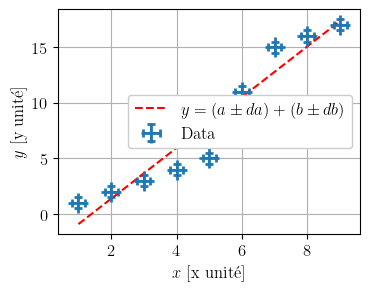

In [49]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a = polynome_output[0]
b = polynome_output[1]
da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])

# erreurs
erreur_x = 0.2 # par exemple
erreur_y = 0.5
dx = erreur_x*np.ones_like(x) # défini un array de la même taille que x avec des 1s dans chaque position, 
                              # et après on multiplie par la valeur de l'erreur
dy = erreur_y*np.ones_like(y) # idem

# plot 
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data') # capsize controle la taille des petites barres au bouts
# ordre d'arguments un peu fucked mais oui c'est plt.errorbar(x, y, erreur de y, erreur de x, ...)
# souvent on s'en tape de l'erreur en x par contre, tu peux juste enlever "dx" dans ce cas
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')


pour les erreurs qui varient

Text(0, 0.5, '$y$ [y unité]')

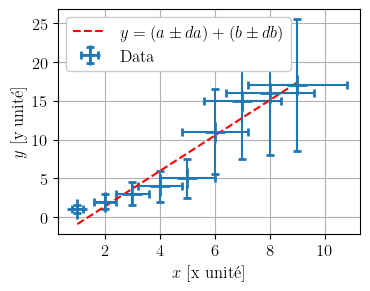

In [50]:
# fit
degree_of_fit = 1
polynome_output, matrice_covariante = np.polyfit(x, y, deg=degree_of_fit, cov=True)
a = polynome_output[0]
b = polynome_output[1]
da = np.sqrt(matrice_covariante[0][0])
db = np.sqrt(matrice_covariante[1][1])

# erreurs
erreur_relative_x = 0.1 # par exemple
erreur_relative_y = 0.1
dx = erreur_x*np.ones_like(x)*x
dy = erreur_y*np.ones_like(y)*y

# plot
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')


mdr c'est un peu extreme les dernières barres d'erreurs, si t'as qqch comme ça c'est euhh inquietant. mais tkt demande à d'autres personnes qui ont déjà fait le tp ou envoie un mail à l'assistant. peut etre que c'est normal (probablement pas mdr)

tom: ca m'est deja arrivé, c'est pas trop grave en vrai, il faut juste discuter des sources d'erreurs / reverifier la formule d'erreur / données(?) / vérifier avec d'anciens rapports

lucia: en vrai ça s'accepte mais il faut etre sûr. mon problème c'est qu'un assistant voit ça et tu l'expliques pas bien, alors il te dit que c'est des erreurs trop grandes et que tu t'es trompé. mais oui définitivement ça m'est arrivé d'avoir des erreurs encore plus que grands que ça mdr (💀 5000% d'erreur mdr, ça c'est pas normal)

## 6. Fonctions intéressantes

### 6.1. Graphiques

#### 6.1.1. Limites des axes
documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

plt.xlim(), plt.ylim()

controller où tu veux couper le graphique, dcp si tu veux que montrer jusqu'à 5m dans l'échelle de l'axe x tu fais:   plt.xlim(0,5)

(0.0, 8.0)

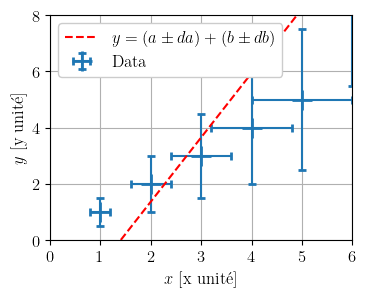

In [51]:
# exemple
plt.errorbar(x, y, dy, dx, '+', capsize=3, ms=15, mew=2, label='Data')
truc = np.linspace(x[0], x[-1], 10)
plt.plot(truc, a*truc+b, 'r--', label=r'$y = (a\pm da)+(b \pm db)$')
plt.legend()
plt.xlabel('$x$ [x unité]')
plt.ylabel('$y$ [y unité]')
plt.xlim(0, 6)
plt.ylim(0, 8)

#### 6.1.2. Tracer des droites facilement


documentation hlines (horizontal): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hlines.html

documentation vlines (vertical): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html

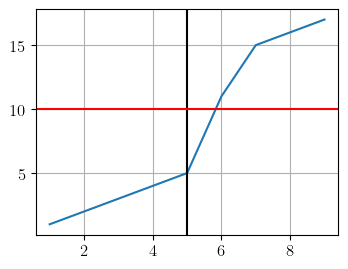

In [52]:
plt.plot(x, y)
plt.axvline(5, color='k')
plt.axhline(10, color='r')

#### 6.1.3. Scientific format for axis


documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0)) --> puts y axis ticks in scientific format

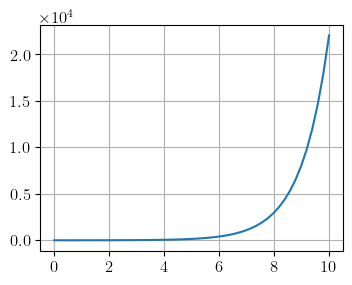

In [53]:
data_x = np.linspace(0, 10)
data_y = np.exp(data_x)
plt.plot(data_x, data_y)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#### 6.1.4. Echelle logarithmique

documentation: https://matplotlib.org/stable/users/explain/axes/axes_scales.html

de temps en temps il faut montrer une relation exponentielle et non linéaire pour tes datas, alors pour faire un plot avec echelle logarithmique

`plt.loglog(x, y, ...)` ou `plt.semilogx(x, y, ...)` (pour l'axe x en log) ou `plt.semilogy(x, y, ...)` (tu comprends) ou `plt.yscale('log')`

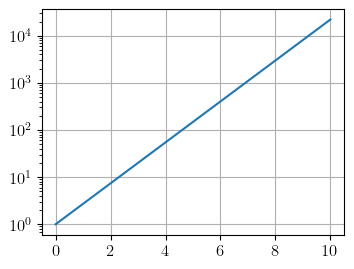

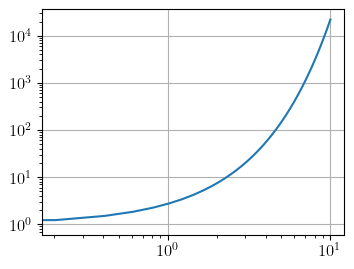

In [54]:
plt.plot(data_x, data_y)
plt.yscale('log')
plt.show()
# ou
plt.loglog(data_x, data_y)  # memes arguments que plt.plot

#### 6.1.5. Comment trouver un point graphiquement? petit tuto

En mettant une couleur différente pour une partie limité des points, on peut trouver l'indice du vector d'un certain point.

C'est particulièrement utile si t'essayes de trouver l'indice d'un point pour une certaine valeur et t'as des centaines de points.

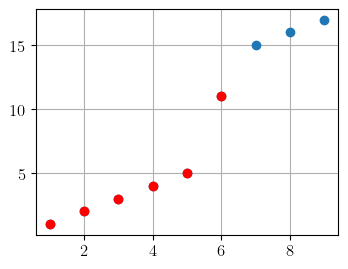

In [55]:
ms = 12
n = 6 # change ça à 4 ou 9 par exemple, pour voir ce que je veux dire
plt.plot(x, y, '.', ms=ms)
plt.plot(x[:n], y[:n], 'r.', ms=ms) 

## 7. Le calcul d'incertitudes, c'est chiant

Alors laissons python le faire!

Il y a une librairie qui s'appelle uncertainties (documentation: https://uncertainties.readthedocs.io/en/latest/) qui est vraiment pas mal (faut apprendre a s'en servir et faire attention avec certaines fonctions mais autrement c'est pas mal)

lucia: perso ça m'a fait trop chier d'essayer d'apprendre à l'utiliser pendant le semestre quand j'avais déjà mes propres habitudes. dcp il faut juste choisir soit de l'utiliser et faire un peu d'effort pour qu'après ça soit très très facile. soit give up and suffer comme moi

In [56]:
import uncertainties as uc
import uncertainties.unumpy as unp

In [57]:
# Une valeur avec incertitude
a = uc.ufloat(42, 0.69)
a

42.0+/-0.69

In [58]:
# récuperer valeur (nominal_value) et incertitude (standard_deviation)
a.n, a.s

(42.0, 0.69)

In [59]:
# Toutes les operations fonctionnent toujours
print(a + 27)
b = uc.ufloat(32, 2.6)
print(a+b)
print(a/b)
# pour toutes les fonctions maths, utiliser unumpy.(...)
print(unp.cos(a))
print(unp.arctanh(b / 100))

69.0+/-0.7
74.0+/-2.7
1.31+/-0.11
-0.4+/-0.6
0.332+/-0.029


In [60]:
# On peut la formatter tres facilement: https://uncertainties.readthedocs.io/en/latest/formatting.html
# 2 chiffres significatif
print(f"{a:.2u}")

# 1 chiffre significatif (1u), notation scientifique (e)
print(f"{a:.1ue}")

# avec formattage latex (pratique pour les legendes dans matplotlib!)
print(f"{a:.1ueL}")

# avec un formattage "beau"
print(f"{a:.1ueP}")

# forcer avec des parentheses autour (comme Iva le veut toujours!)
print(f"{a:.2up}")

42.00+/-0.69
(4.20+/-0.07)e+01
\left(4.20 \pm 0.07\right) \times 10^{1}
(4.20±0.07)×10¹
(42.00+/-0.69)


In [61]:
# Faire des array (numpy) de ufloat, c'est possible
# un array de valeur / erreur
a = unp.uarray((0, 1, 2, 3, 4), (0.1, 0.2, 0.258, 0.5, 0.8))
a

array([0.0+/-0.1, 1.0+/-0.2, 2.0+/-0.258, 3.0+/-0.5, 4.0+/-0.8],
      dtype=object)

In [62]:
# Les opérations ca marche toujours
print(unp.cos(a))
b = np.copy(a) + uc.ufloat(42, 5.6) - 5
print(a + b)

[1.0+/-0 0.5403023058681398+/-0.16829419696157932
 -0.4161468365471424+/-0.23459873612102589
 -0.9899924966004454+/-0.0705600040299336
 -0.6536436208636119+/-0.6054419962463427]
[37.0+/-5.60357029044876 39.0+/-5.61426753904728 41.0+/-5.623722610513431
 43.0+/-5.688585061331157 45.0+/-5.824087911424414]


<ErrorbarContainer object of 3 artists>

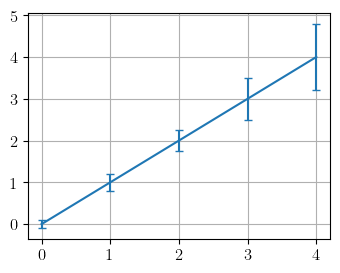

In [63]:
# pour donner a matplotlib (ou d'autres fonctions quand ca marche pas (scipy par exemple)), il faut extraire les valeurs et incertitudes
# c'est un peu chiant mais ca passe
valeurs_a = unp.nominal_values(a)
incertitudes_a = unp.std_devs(a)
plt.errorbar(range(5), valeurs_a, incertitudes_a)

---
Made with ❤️ by
- @Lucia: quasiment tout
- [@Tom](https://github.com/TomVdt): revisions, exemples concrets, uncertainties